* **Neural Network using numpy from scratch **

The diagram below shows the architecture of a 2-layer Neural Network
It consist 
* Input layer with 4 features
* One Hidden layer consist 4 hidden units with sigmoid activation function
* Output layer consist one with sigmoid activation function


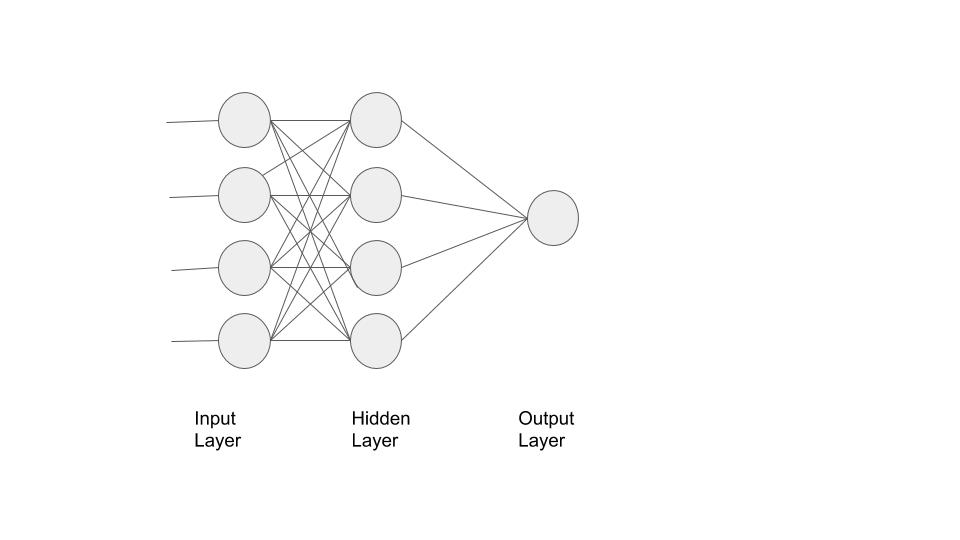

**Creating a Neural Network in python from scartch **

We divids it into 6 parts
* Initialize Network.
* Forward Propagate.
* Back Propagate Error.
* Feed Data
* Train Network.
* Predict.

In [ ]:
import numpy as np

learning_rate=0.02
observation=1000

xs=np.random.uniform(-10,10,(observation,1))
ys=np.random.uniform(-10,10,(observation,1))
zs=np.random.uniform(-10,10,(observation,1))

X=np.append(xs, ys, axis=1);
X=np.append(X, zs, axis=1);


print(X.shape)
Y=2*xs-3*ys+6*zs+5
Y.shape
Y

* Let's see Intialize Network, Forward Propagate and Back propagate Error

In [155]:
#degining activation function it transformed the given value between 0.0 and 1.0
def sigmoidactivation(output):  
        return 1.0/(1+np.exp(-output))
    
#derivative of sigmoid activation function     
def sigmoid_derivative(output):
        return output*(1.0 - output)
    
def lossfunction(Y,Y_hat):
        return np.sum((Y-Y_hat)**2)
        


In [159]:
#defining Neural Network Class
class NN:
    def __init__(self,x,y): # constructor 
        self.learning_rate=0.01
        self.input=x; # Assigning feature set to input variable 
        self.weight1=np.random.rand(self.input.shape[1],4) # creating the weight with size Mx4  here M is total no of features in input 
        self.weight2=np.random.rand(4,1) # At the final layer we have one 4 weights with 1 output i.e 4x1 
        self.output=y # assigning target varible to output 
        self.y_hat=np.zeros(self.output.shape)
    
  

    #feedforward Neural Network 
    def feedforward(self):
        output1=np.dot(self.input,self.weight1) # calculating the output at 1st hidden layer i.e output1=input*weight1
        self.layer1=sigmoidactivation(output1) # Applying the sigmoid activation function for given output1
        output2=np.dot(self.layer1,self.weight2) #calculating output for final layer i.e output layer it takes the output from previous layer as input layer i.e output2=output1*weights2
        self.y_hat=sigmoidactivation(output2) # Applying the activation function to output2 
        return lossfunction(self.output,self.y_hat)
      
    # Updating the Weights 
    def backpropogation(self):
        Error=self.output-self.y_hat #calculating the Loss/Error between predicted value and target value 
        d_w2= np.dot(self.layer1.T, (2*(Error) * sigmoid_derivative(self.y_hat))) # Minimizing the Error with respect to Weight 2
        #Minimizing the Error with respect to Weight 1
        d_w1= np.dot(self.input.T,  (np.dot(2*(Error) * sigmoid_derivative(self.y_hat), self.weight2.T) * sigmoid_derivative(self.layer1)))
        #Update the both weights by adding new weights to old weights 
        self.weight1 +=self.learning_rate* d_w1 
        self.weight2 += self.learning_rate*d_w2
       
    
    #Final prediction on test data
    def prediction(self,X_test):
        hiddenlayer=sigmoidactivation(np.dot(X_test,self.weight1))
        output=sigmoidactivation(np.dot(hiddenlayer,self.weight2))
        return output
        
        

* Feed Data

> Now it's time to Feed data to our model 
Here We are using Banknote Dataset. This dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph. it is binary classification (0/1).
It consist following features 
* Variance of Wavelet Transformed image (continuous).
* Skewness of Wavelet Transformed image (continuous).
* Kurtosis of Wavelet Transformed image (continuous).
* Entropy of image (continuous).
* Class (0 for authentic, 1 for inauthentic).

In [146]:
import os
print(os.listdir("../input/backnote1"))

['datasets_84803_196262_BankNote_Authentication.csv']


In [153]:

import numpy as np
import pandas as pd # for loding  our dataset 
from sklearn.model_selection import train_test_split
dataset=pd.read_csv('../input/backnote1/datasets_84803_196262_BankNote_Authentication.csv');  #load dataset 
X = dataset[[ 'variance', 'skewness','curtosis','entropy']].values # features 
Y = dataset['class'].values #target value 
X= (X - X.mean())/X.std() # performing normalization so that all inputs in scale 
"""
spiliting the dataset into train and test data by  80% 20% rule 
here 80% for training and 20% for testing.
test data is used for checking how well our model is trained by providing unseen data """

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
print("Train dataset size:",X_train.shape)
print("Test dataset size:",X_test.shape)
X_train, y_train = shuffle(X_train, y_train) # shuffling dataset 
#norm = np.linalg.norm(X)
#X = X/norm
y_train=y_train.reshape((y_train.shape[0], 1)) # reshaping the dataset into 1097, to 1097x1




Train dataset size: (1097, 4)
Test dataset size: (275, 4)


* Tranied Network

Total No of epochs used=100

learning rate = 0.01

In [167]:
#traning the model on X_train dataset 
import math
nn=NN(X_train,y_train) #creating the object of NN class and passing the X-Input data and Y-target values to constructor 
Epochs=100 #total no of epoches 
for i in range(Epochs):
    
    error=nn.feedforward() #calls the feedforward for calculting the predicted output 
    print(f'epoch: {i}')
    nn.backpropogation() # calls the backpropagation for minimizing the error and updating the weights for more accurate results   

print("Model Trained...........")

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
Model Trai

**Final Architecure **
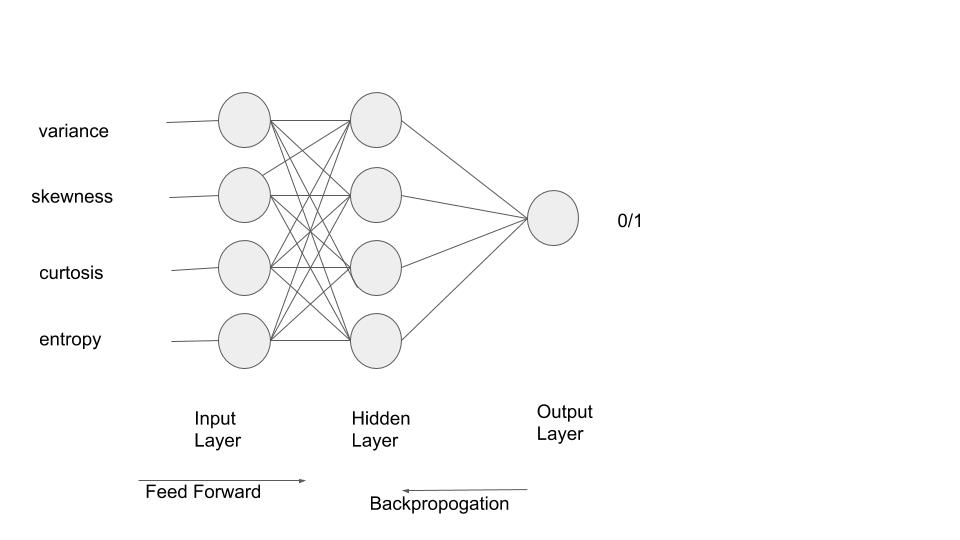

* Predict

In [165]:
y_hat=nn.prediction(X_test);
y_hat=y_hat.reshape((y_test.shape[0],));
output=[]
"""for i in y_hat:
    output.append(math.floor(i))
    

count=0;
for i in range(len(y_test)):
    if output[i]==int(y_test[i]):
        count=count+1;
#print(count,y_test.shape[0])
print(np.column_stack((y_test,y_hat)))"""
loss=pd.DataFrame({'Acutal':y_test,'predicted':y_hat});
print(loss);


     Acutal  predicted
0         1   0.967775
1         0   0.005315
2         1   0.975303
3         0   0.004779
4         0   0.003555
..      ...        ...
270       1   0.970601
271       0   0.006909
272       1   0.986615
273       1   0.946697
274       1   0.949611

[275 rows x 2 columns]


Here Value closer to 1 comes into class 1 and value closer to 0 comes into class 0